# Insurance Fraud Detection Model

## Data Description

Insurance fraud is an act committed for financial gains by exploiting the contract of insurance company. It can be by misinterpreting the facts for insurance claims or infiating incidents. It is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. The problem with fraud detection machine learning model is that they are very less common thus making our data imbalanced.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, our aim is to classify auto fraud detection that arises from claims

 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df= pd.read_csv(r"Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

Number of rows = 1000

Number of columns = 40

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column _c39 has all null values therefore we will drop it. And there is no missing value in rest of our data.

In [7]:
df.drop(columns=["_c39"],inplace=True)

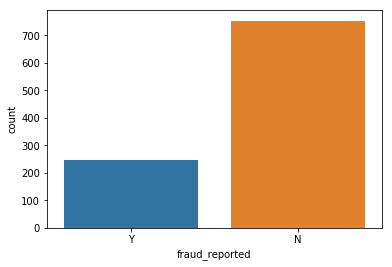

In [8]:
sns.countplot(df["fraud_reported"])

Our data is imbalanced

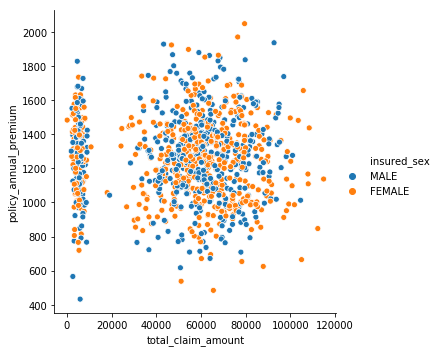

In [9]:
sns.relplot(x='total_claim_amount', y='policy_annual_premium', data=df ,hue= 'insured_sex')

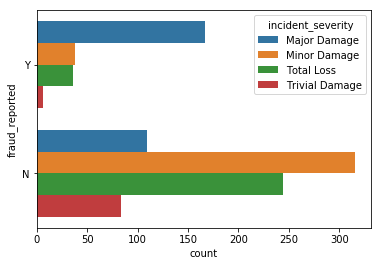

In [10]:
sns.countplot(y=df['fraud_reported'], hue=df['incident_severity'],orient='h')

Major incident severity seems to have high fraud cases that are even more than non-fraud cases.

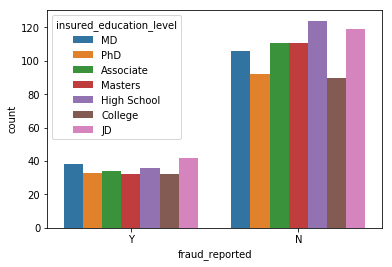

In [11]:
sns.countplot(df["fraud_reported"],hue=df['insured_education_level'])

Education level have no such impact on fraud claims

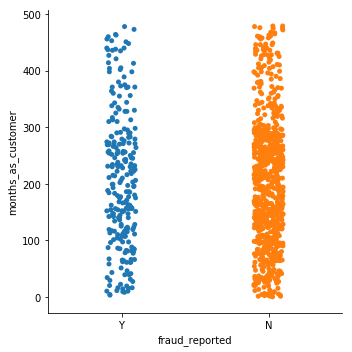

In [12]:
sns.catplot(x="fraud_reported", y="months_as_customer", data=df)

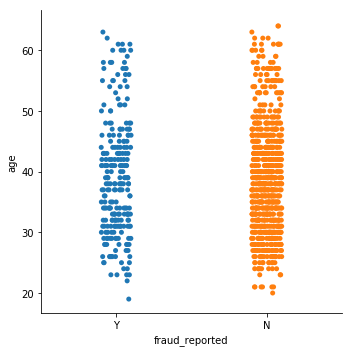

In [13]:
sns.catplot(x="fraud_reported", y="age", data=df)

From above two plots we can conclude that age and number of months someone has been a customer doesn't have any effect on fraud claims.

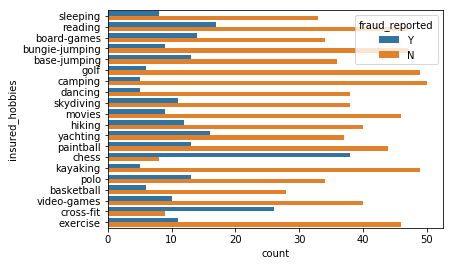

In [14]:
sns.countplot(hue=df['fraud_reported'], y=df['insured_hobbies'], orient='h')

We observe here that people who play chess and crossfit are more likely to commit fraud

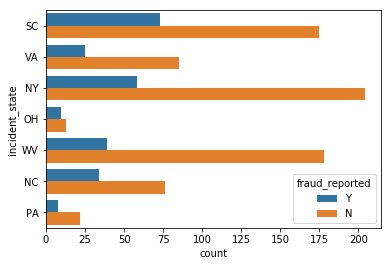

In [15]:
sns.countplot(hue=df['fraud_reported'], y=df['incident_state'], orient='h')

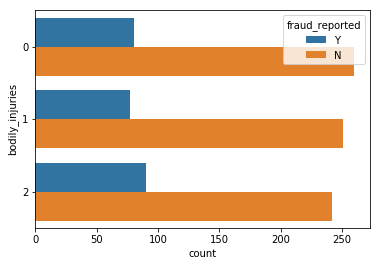

In [16]:
sns.countplot(hue=df['fraud_reported'], y=df['bodily_injuries'], orient='h')

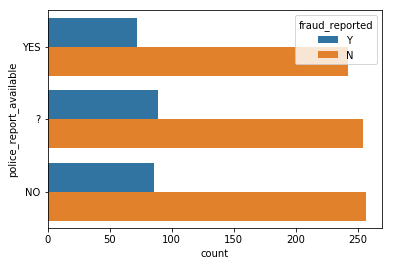

In [17]:
sns.countplot(hue=df['fraud_reported'], y=df['police_report_available'], orient='h')

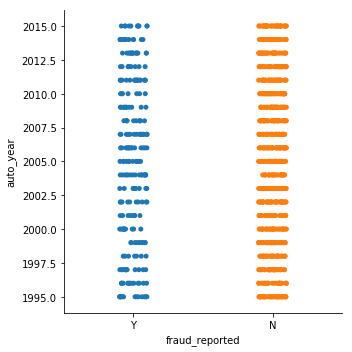

In [18]:
sns.catplot(x="fraud_reported", y="auto_year", data=df)

Above few plots doesnot give anything productive we will now move further to look at statisical description of data

In [19]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


We can look closly at data distribution here by looking at mean, standard deviation, Minimum value, maximum value and quartiles. We observe some features have outliers in it and also continuous variables have variance.

Also the object type data cannot be considered further so we will encode them using label encoder.

In [15]:
obj_lst=["policy_bind_date","policy_state", "policy_csl","insured_sex", "insured_education_level",
         "insured_occupation", "insured_hobbies", "insured_relationship","incident_date", "incident_type", 
         "collision_type", "incident_severity", "authorities_contacted", "incident_state", "incident_city", 
         "incident_location","property_damage","police_report_available","auto_make", "auto_model","fraud_reported"]
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


#### Check for correlation

In [16]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


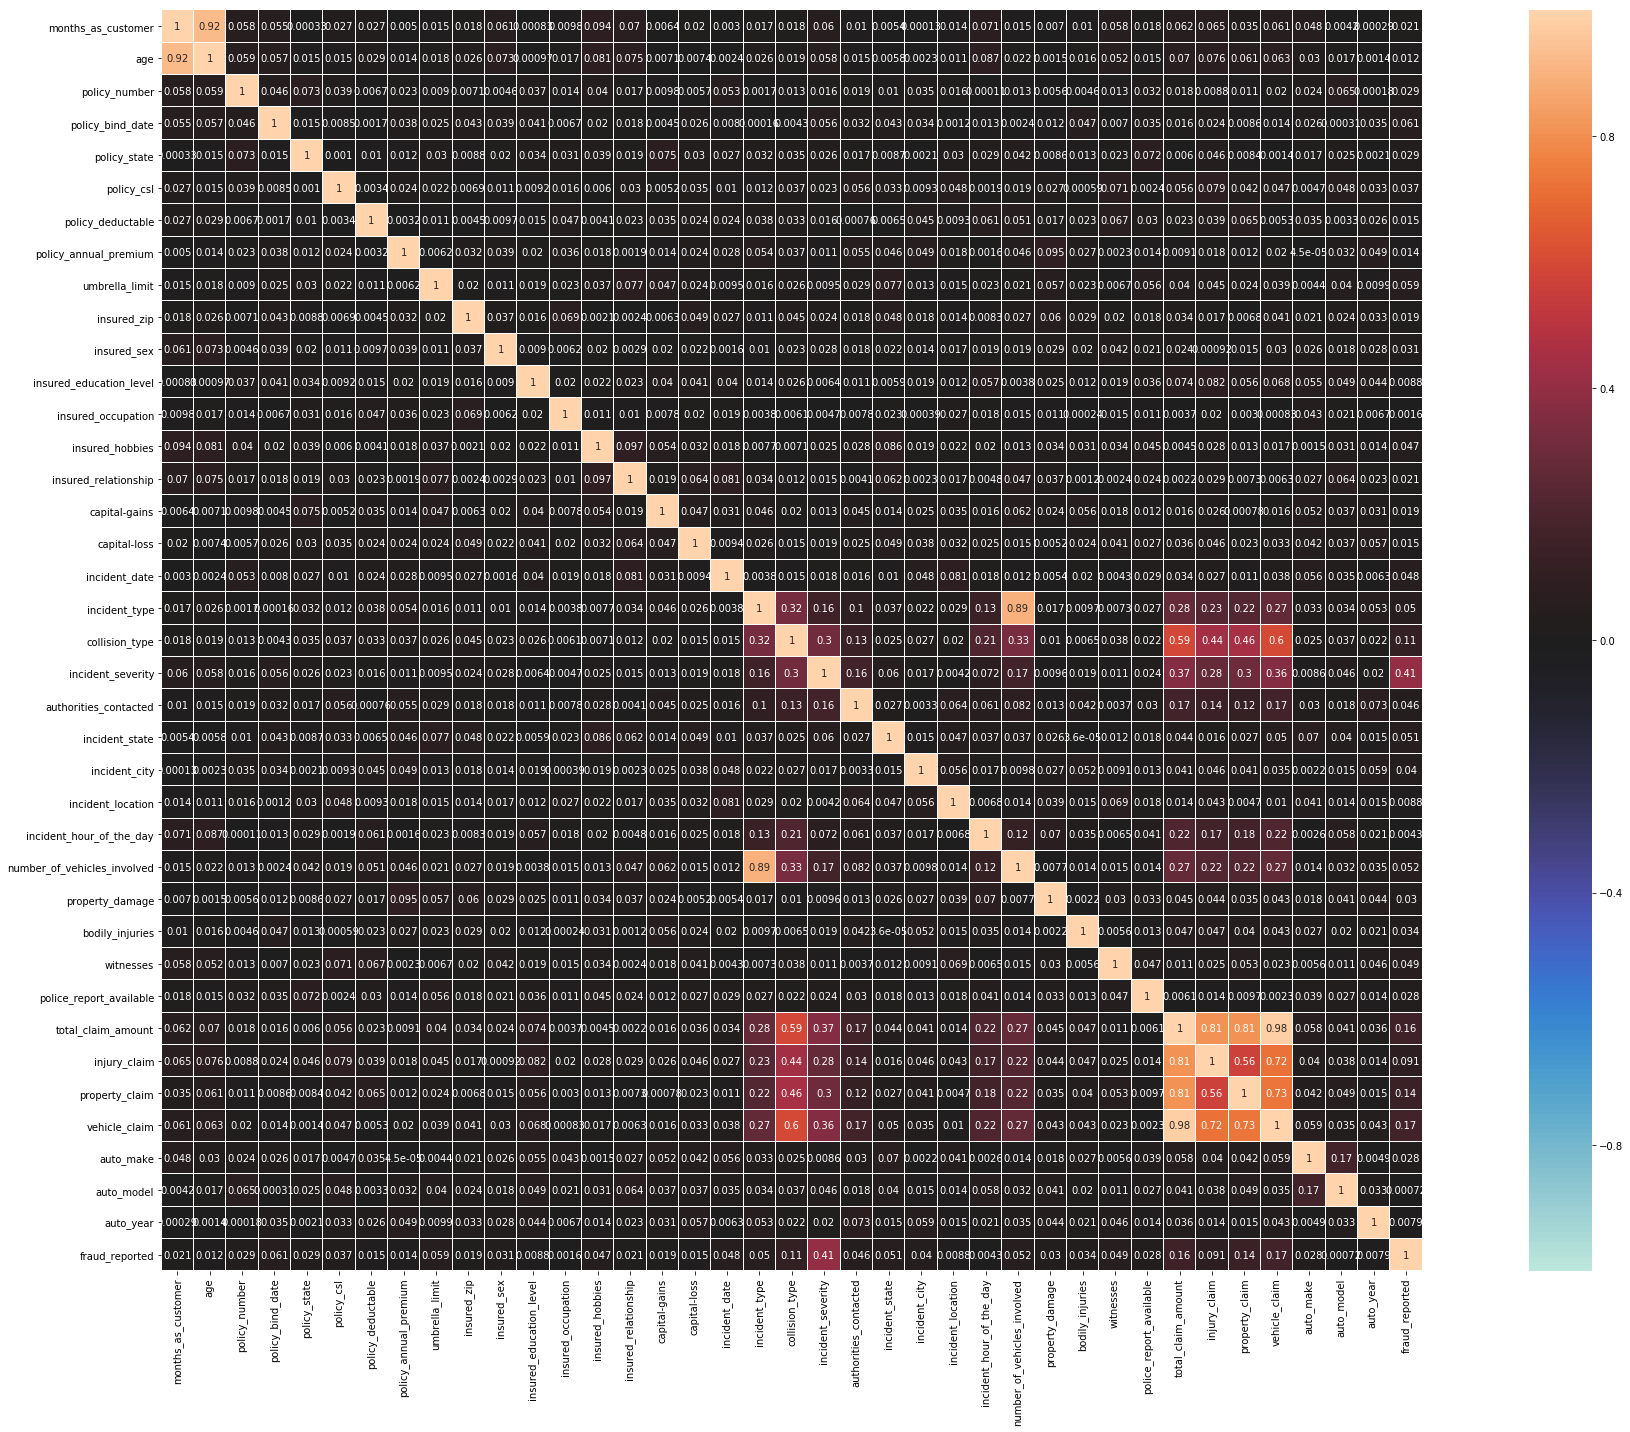

In [17]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe multicollinearity in few features such as age and months_as_customer, total_claim_amount, injury_claim, property_claim and injury_claim.

In [18]:
# Correlation with target variable
corr_mat=df.corr()
corr_mat["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


Minimum correlation with target variable : auto_model

Maximum correlation with target variable : incident_severity

#### Plot and check for outliers

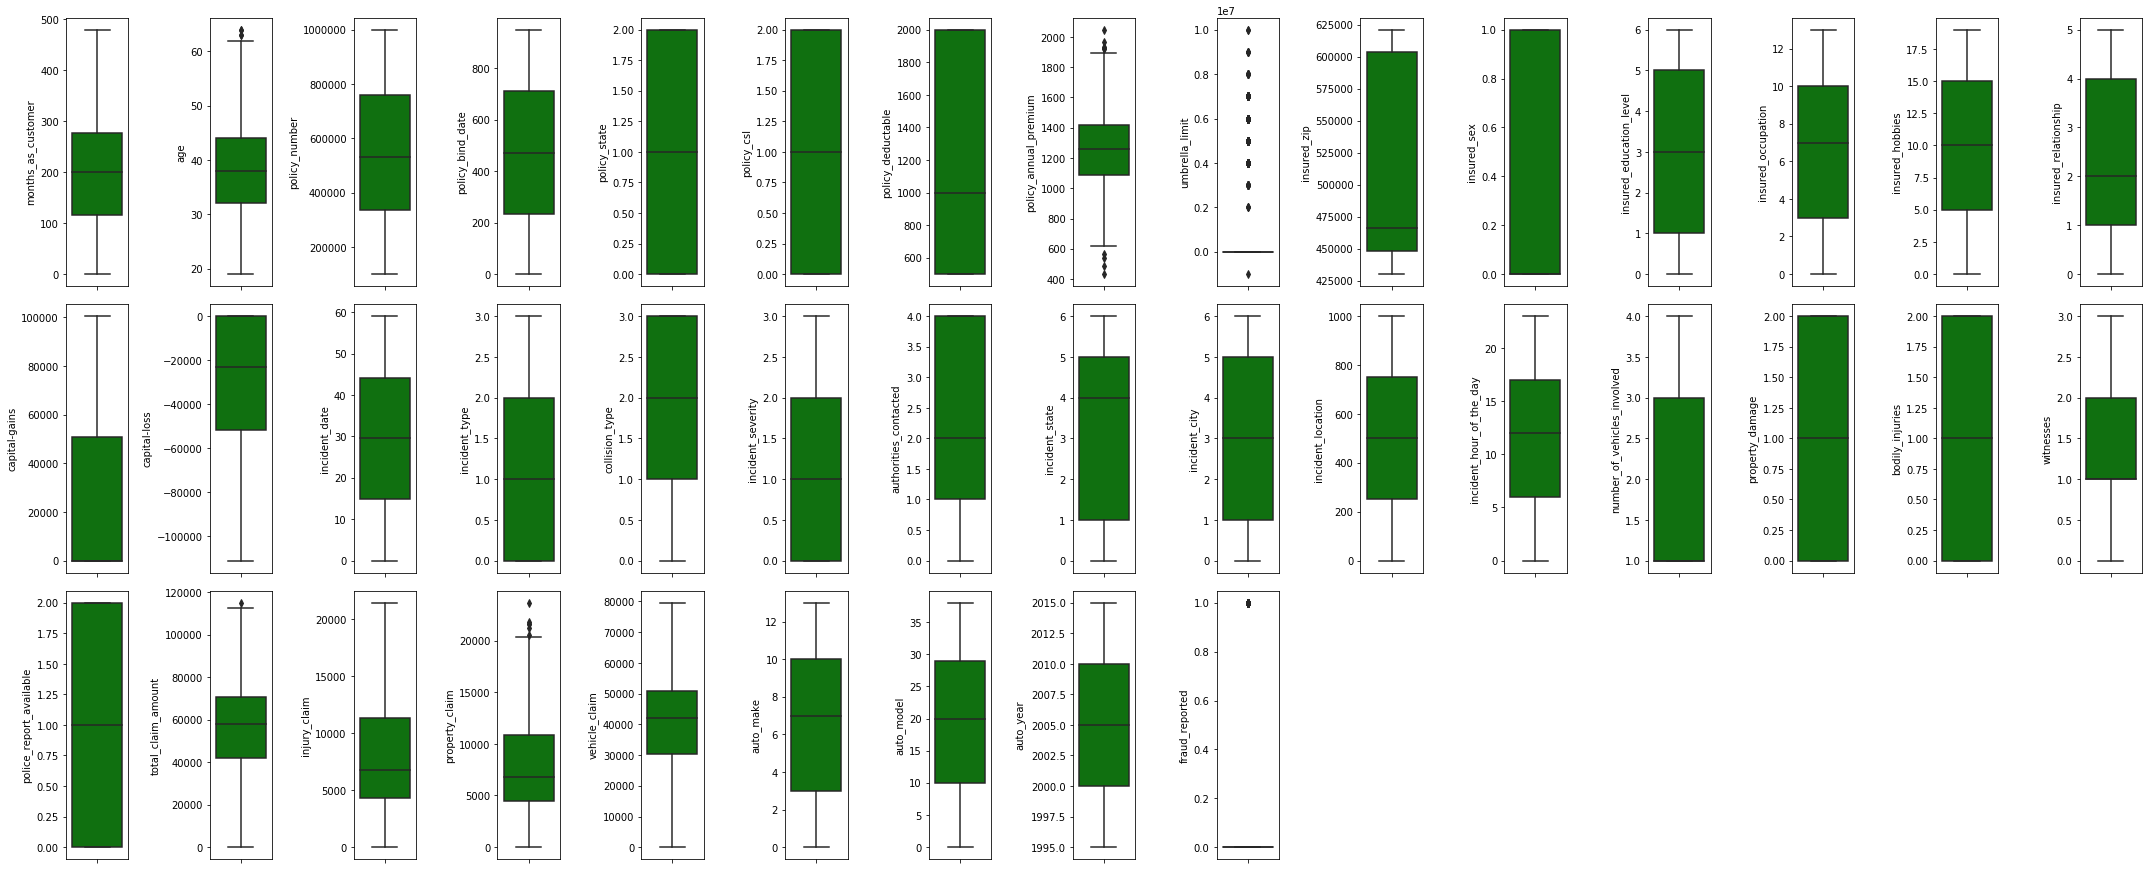

In [24]:
collist=df.columns.values
plt.figure(figsize=(30,40))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers are observed in following columns: policy_annual_premium, age, total_claim_amount, property_claim

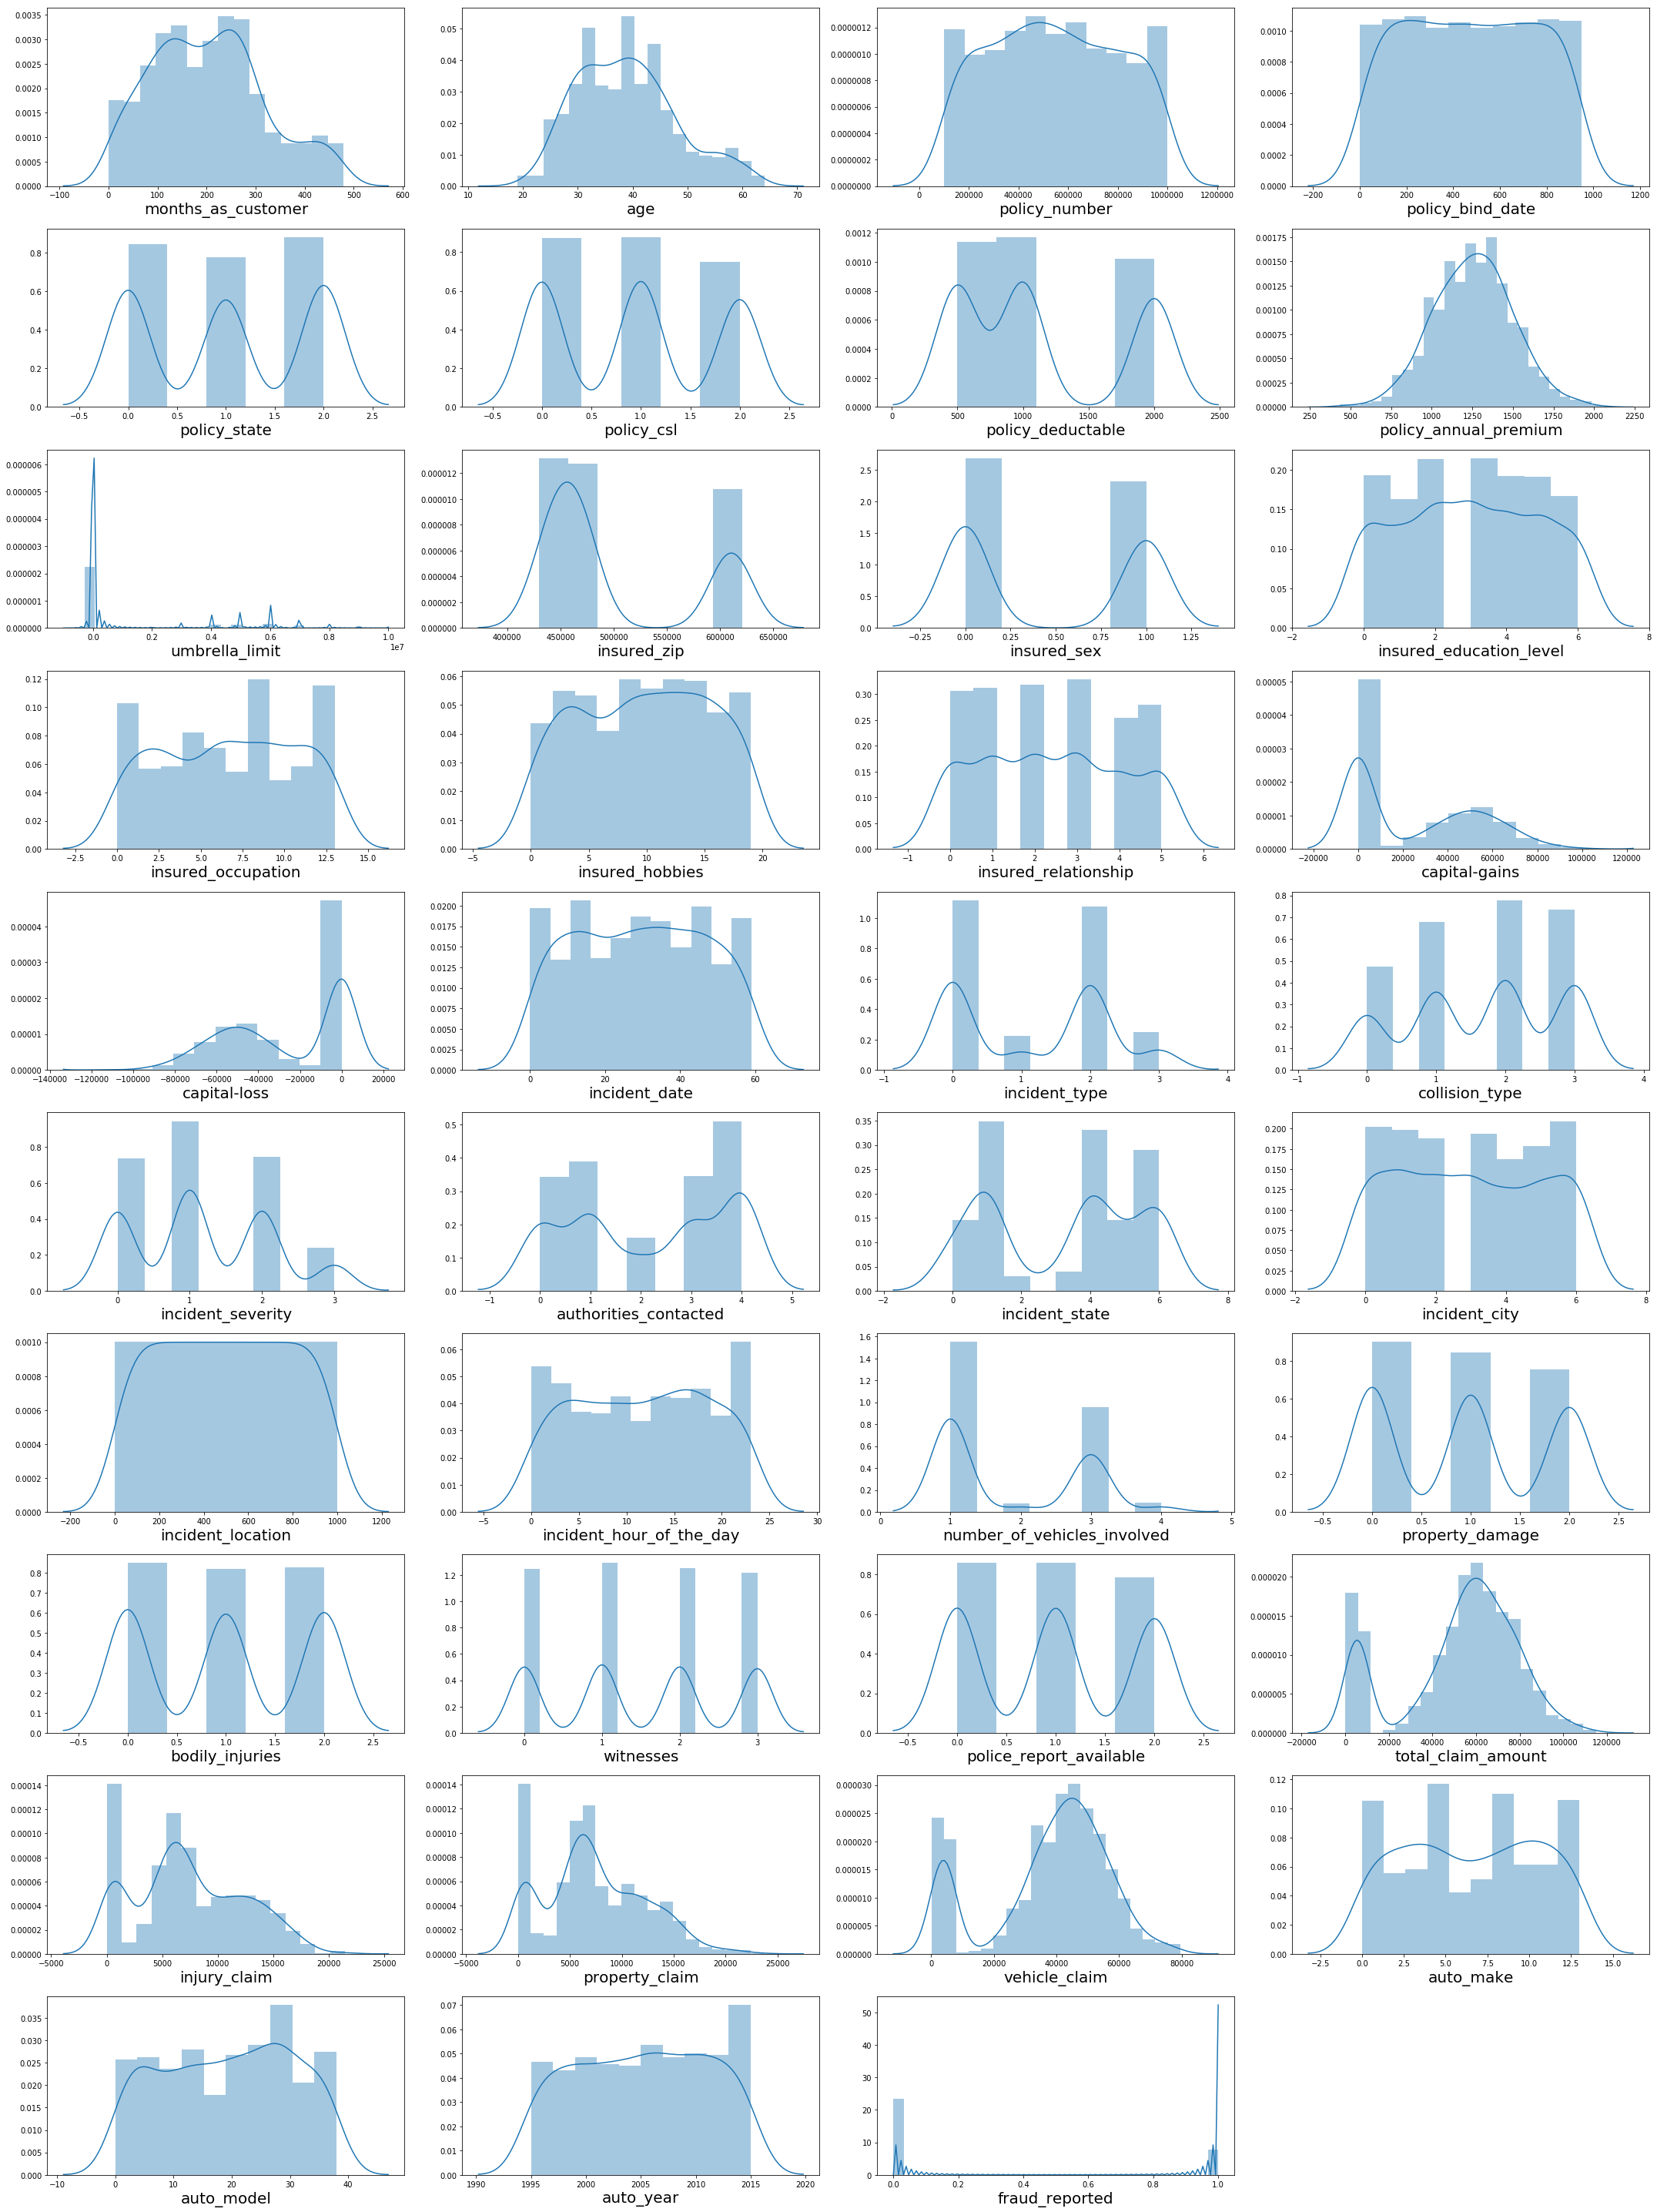

In [19]:
## checking for Normal Distribution of curve
plt.figure(figsize=(30,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

continuous numeric data here is skewed and hence normal distribution curve is irrelevant.

## Data Cleaning

We won't delete data on basis of multicollinearity as we don't observe a very good correlation of features with target variable. So we will only remove outliers using z-score method.

In [20]:
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(980, 39)

In [21]:
print("Percentage of data loss= ",(1000-980)/10)

Percentage of data loss=  2.0


In [22]:
x= df.drop(columns=["fraud_reported"])
y=df["fraud_reported"]

In [23]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


We don't observe much skewness in our data so we will move forward to balance it

### Balancing our dataset

In [25]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [26]:
y_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [27]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x_over)

## Building Model

In [28]:
lr=LogisticRegression()
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)

Best random state is  15
Training Score  81.39946855624446
Testing Score  81.43236074270557
Best random state is  20
Training Score  81.39946855624446
Testing Score  81.43236074270557
Best random state is  237
Training Score  81.6651904340124
Testing Score  81.6976127320955
Best random state is  334
Training Score  82.01948627103631
Testing Score  81.9628647214854
Best random state is  356
Training Score  82.19663418954826
Testing Score  82.22811671087533
Best random state is  395
Training Score  82.01948627103631
Testing Score  81.9628647214854
Best random state is  464
Training Score  81.22232063773251
Testing Score  81.16710875331566
Best random state is  473
Training Score  82.46235606731621
Testing Score  82.49336870026525


In [29]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=473)

#### Logistic Regression

In [30]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))

Logistic Regression model Score = 0.8249336870026526


#### KNN Classifier

In [31]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.6631299734748011


#### DecisionTree Classification

In [32]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.8063660477453581


#### SVM

In [33]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.8461538461538461


#### Using Cross Balidation Score for Model Evaluation

#### Logistic Regression

In [34]:
cross_val_score(lr, x_scaled, y_over, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y_over, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.7962333061978834


#### KNN Classifier

In [35]:
cvs_knn=cross_val_score(knn, x_scaled, y_over, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.691925370178874


#### DecisionTree Classification

In [36]:
cross_val_score(dt, x_scaled, y_over, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y_over, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.7942245495148621


#### SVM

In [37]:
cross_val_score(svc, x_scaled, y_over, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y_over, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.8281423951068183


We will now check for difference between cv_score and accuracy_score

In [38]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  0.02870038080476922


In [39]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  -0.02879539670407294


In [40]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  0.01214149823049604


In [41]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  0.018011451047027838


### ROC AUC Curve

In [42]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.8072353603603604
ROC_AUC_Score for Logistic Regression=  0.8251689189189189
ROC_AUC_Score for KNeighboursClassifier=  0.6687781531531531
ROC_AUC_Score for SVM=  0.8459037162162162


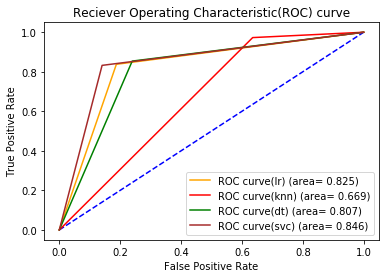

In [43]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

SVM Model is the best model therefore we will now move forward to tune this model

### Hyper Parameter Tuning

In [46]:
clf=SVC()
param={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],
      'degree':range(2,10,2), 'tol':np.arange(0.001,0.1,0.01)}
grid_search=GridSearchCV(estimator=clf, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.06099999999999999}


In [47]:
clf=SVC(kernel='rbf', gamma='auto', tol=0.06099999999999999, degree=2)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8488063660477454

In [48]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.8488063660477454
Confusion Matrix :
 [[165  27]
 [ 31 154]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       192
           1       0.85      0.83      0.84       185

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377


 ROC_AUC_Score for Logistic Regression=  0.8486064189189189


#### Savig Model

In [49]:
filename= "Fraud_Detection.pickle"
pickle.dump(clf,open(filename,'wb'))